In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [2]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
ps_data=pd.read_csv('coimbra_final_data.csv')

ps_data.head(5)

,Unnamed: 0,Age,BMI,Glucose,Insulin,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0,48,23.500000,70,2.707,8.8071,9.702400,7.99585,417.114,1
1,1,83,20.690495,92,3.115,8.8438,5.429285,4.06405,468.786,1
2,2,82,23.124670,91,4.498,17.9393,22.432040,9.27715,554.697,1
3,3,68,21.367521,77,3.226,9.8827,7.169560,12.76600,928.220,1
4,4,86,21.111111,92,3.549,6.6994,4.819240,10.57635,773.920,1


In [4]:
ps_data = ps_data.drop(['Unnamed: 0'],axis=1)

In [5]:
ps_data

,Age,BMI,Glucose,Insulin,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,24.9600,33.750000,3.27000,392.460,2


In [6]:
X=ps_data.iloc[:,1:8]
y=ps_data['Classification']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
print(scaler.fit(X))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
print(scaler.data_max_)

[  38.57875854  201.           58.46         90.28         38.04
   82.1        1698.44      ]


In [10]:
X1=scaler.transform(X)
X1

array([[2.53850329e-01, 7.09219858e-02, 4.90826016e-03, 5.22990846e-02,
        2.21151727e-01, 6.06648498e-02, 2.24659127e-01],
       [1.14826180e-01, 2.26950355e-01, 1.21903334e-02, 5.27259826e-02,
        1.03706769e-01, 1.08258334e-02, 2.55926278e-01],
       [2.35277707e-01, 2.19858156e-01, 3.68744199e-02, 1.58525748e-01,
        5.71021092e-01, 7.69064520e-02, 3.07911729e-01],
       [1.48327833e-01, 1.20567376e-01, 1.41714857e-02, 6.48105713e-02,
        1.51537572e-01, 1.21130688e-01, 5.33933560e-01],
       [1.35639758e-01, 2.26950355e-01, 1.99364603e-02, 2.77821075e-02,
        8.69399115e-02, 9.33749525e-02, 4.40565365e-01],
       [2.21906639e-01, 2.26950355e-01, 1.41714857e-02, 2.93210343e-02,
        3.30467695e-01, 9.00950691e-02, 2.93215466e-01],
       [2.14263533e-01, 1.20567376e-01, 4.03012779e-02, 3.08599611e-02,
        1.08120250e-01, 1.23286855e-01, 7.32326151e-01],
       [2.68695377e-01, 4.11347518e-01, 7.20711073e-02, 0.00000000e+00,
        3.18692458e-01, 2

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=4)
# X[X < 0] = 0

In [12]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha =0.2)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [13]:
  #defining a dictionary of classifier
classifier={'MultinomialNB': mnb,'GaussianNB': gnb}

#Classifi=['MultinomialNB','GaussianNB','LogisticR','RandomForest','Adaboost','XGBoost','KNeighbors',
#          'SVM','DecisionTreeClassifier']

classifi=sorted(classifier.keys())
print(classifi)
df=pd.DataFrame(classifi,columns=['Classiifier'])
df

['GaussianNB', 'MultinomialNB']


,Classiifier
0,GaussianNB
1,MultinomialNB



 classifier GaussianNB 
 results 
 [0.625      0.875      0.875      0.5        0.625      0.875
 0.625      0.125      0.375      0.5        0.625      1.
 0.14285714 0.28571429 0.28571429]

 classifier GaussianNB 
 mean results 
 0.555952380952381

 classifier MultinomialNB 
 results 
 [0.         0.         0.         0.         0.         0.
 0.5        1.         1.         1.         0.75       1.
 0.71428571 0.42857143 0.14285714]

 classifier MultinomialNB 
 mean results 
 0.4357142857142858
           0         1
0   0.625000  0.000000
1   0.875000  0.000000
2   0.875000  0.000000
3   0.500000  0.000000
4   0.625000  0.000000
5   0.875000  0.000000
6   0.625000  0.500000
7   0.125000  1.000000
8   0.375000  1.000000
9   0.500000  1.000000
10  0.625000  0.750000
11  1.000000  1.000000
12  0.142857  0.714286
13  0.285714  0.428571
14  0.285714  0.142857


<Figure size 2160x1800 with 0 Axes>

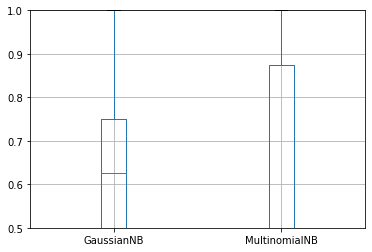

In [14]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted(classifier.items()):
    kfold = KFold(n_splits=15, random_state=0)
    results = cross_val_score(c, X1, y, cv=kfold)
    print("\n classifier",n,"\n results \n",results)
    print("\n classifier",n,"\n mean results \n",results.mean())
    parameter.append((n,[results.mean()]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
#     sns.boxplot( result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
#     plt.ylabel('Accuracy')
#     plt.xticks(parameter_df['mean'])
print(res)
res.columns = ['GaussianNB', 'MultinomialNB']

boxplot = res.boxplot(grid=True,figsize=(25,15))
#boxplot1 = res.boxplot(grid=True,figsize=(25,15))

boxplot.set_ylim([0.5,1.0])
#boxplot1.set_ylim([0.5,1.0])
plt.show()


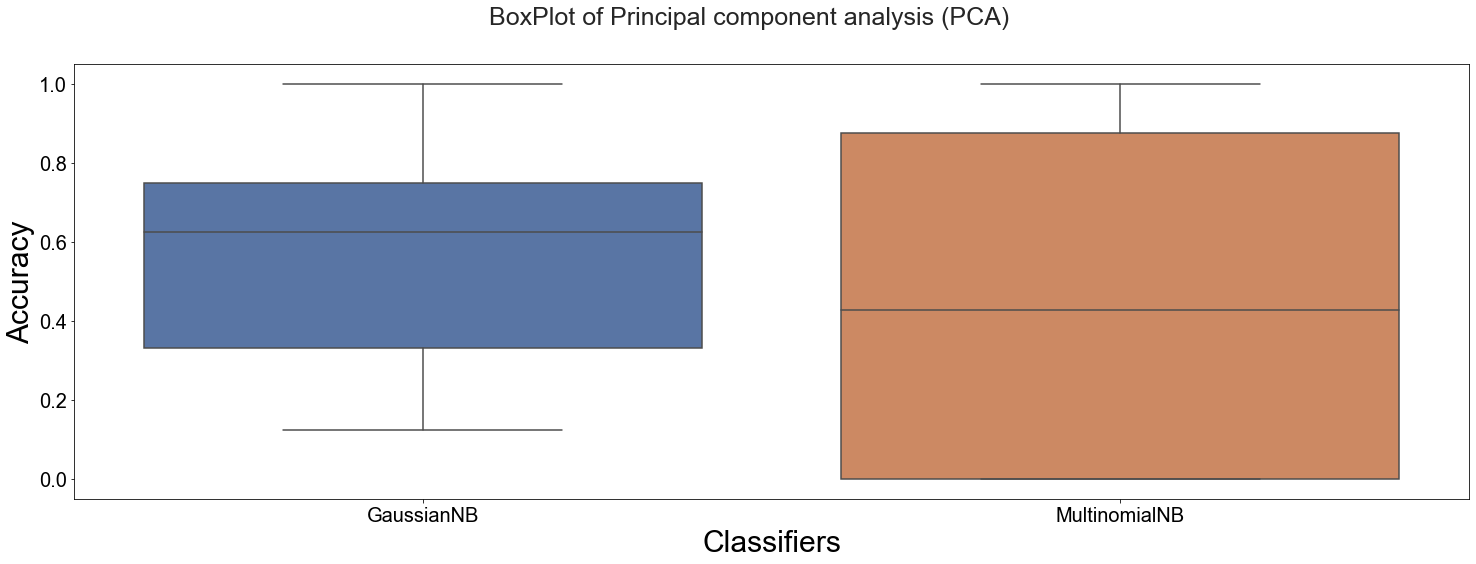

In [15]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.8)
fig.suptitle('BoxPlot of Principal component analysis (PCA)', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
# plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/PCA2.png')
plt.show()

In [16]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
GaussianNB,0.555952
MultinomialNB,0.435714


In [17]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.005513191223144531
Confusion_matrix 
 [[13  4]
 [10  8]]
0.5652173913043478
0.7647058823529411


ValueError: Data is not binary and pos_label is not specified

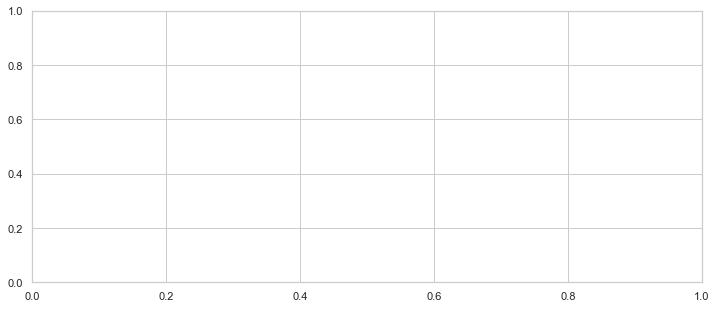

In [18]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=metrics.precision_score(y_test, pred)
    print(precision)
    recall=metrics.recall_score(y_test, pred)
    print(recall)
#     ROC AND AUC CURVE
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    plt.plot(fpr, tpr,marker='.',label=n)
    # plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
# plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/PCA3.png')
plt.show()

In [19]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
GaussianNB,0.6,0.565217,0.764706,60.0


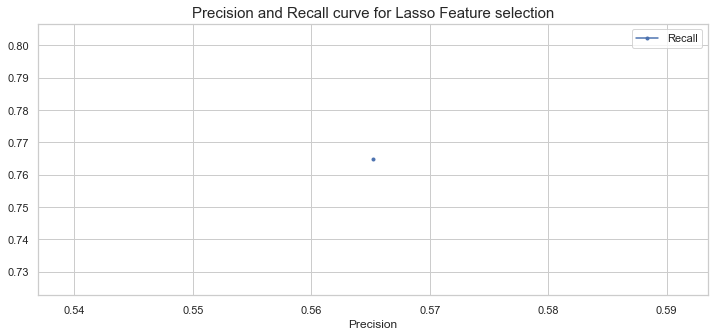

In [20]:
score_df.plot(x='Precision', y='Recall', marker='.',figsize=(12,5))
plt.title('Precision and Recall curve for Lasso Feature selection',fontsize=15)
plt.show()

IndexError: index out of bounds

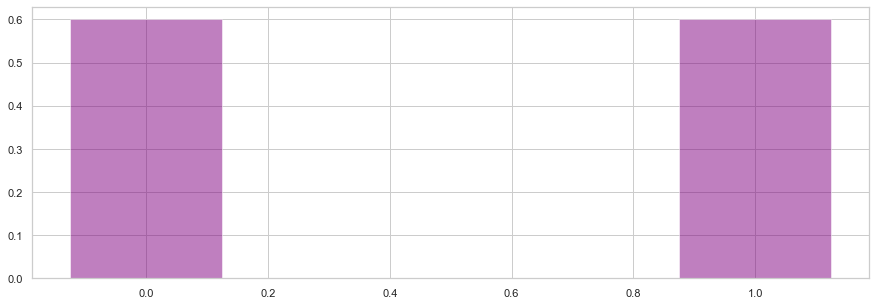

In [21]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on PCA',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
# plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/PCA1.png')
plt.show()